In [1]:
import pandas as pd
import numpy as np
import fredpy as fp
import matplotlib.pyplot as plt

# Loading API key 


In [2]:
fp.api_key = '6ce523c65ffb8915dddf970acab037d6'

The goal of this project is to predit the corporate bond spreads. This notebook provides the code to create the dataframe required to train and run AI/ML models to predict the corporate bond spreads. The inputs used for predicting corporate bond spreads are SP 500, vix, slope(T10y-T2y spreads), skew, GDP, fed fund rate, inflation rate


# Downloading the required input data

The breakeven inflation rate represents a measure of expected inflation derived from 10-Year Treasury Constant Maturity Securities (BC_10YEAR) and 10-Year Treasury Inflation-Indexed Constant Maturity Securities (TC_10YEAR). The latest value implies what market participants expect inflation to be in the next 10 years, on average.
Starting with the update on June 21, 2019, the Treasury bond data used in calculating interest rate spreads is obtained directly from the U.S. Treasury Department. 

The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need of larger balances. In simpler terms, a bank with excess cash, which is often referred to as liquidity, will lend to another bank that needs to quickly raise liquidity. (1) The rate that the borrowing institution pays to the lending institution is determined between the two banks; the weighted average rate for all of these types of negotiations is called the effective federal funds rate.(2) The effective federal funds rate is essentially determined by the market but is influenced by the Federal Reserve through open market operations to reach the federal funds rate target.

The S&P CoreLogic Case-Shiller Home Price Indices are the leading measures of U.S. residential real estate prices, tracking changes in the value of residential real estate nationally. 

The effective yield of the ICE BofA AAA US Corporate Index, a subset of the ICE BofA US Corporate Master Index tracking the performance of US dollar denominated investment grade rated corporate debt publicly issued in the US domestic market.

In [3]:
# Restrict observations from January 1, 2014 to 2023 with daily frequency
win = ['01-01-2014','01-01-2023']

sp500 = fp.series('SP500').window(win).as_frequency(freq='D')
vix = fp.series('VIXCLS').window(win).as_frequency(freq='D')
slope = fp.series('T10Y2Y').window(win).as_frequency(freq='D')
gdp = fp.series('GDP').window(win).as_frequency(freq='Q')
fedfund_rate = fp.series('DFF').window(win).as_frequency(freq='D')
breakeven_inflation_rate = fp.series('T10YIE').window(win).as_frequency(freq='D')
case_schiller_index = fp.series('CSUSHPINSA').window(win).as_frequency(freq='M')
cb_spreads = fp.series('BAMLC0A1CAAAEY').window(win).as_frequency(freq='D')
cpi = fp.series('CPIAUCSL').window(win).as_frequency(freq='M')

# Equalize the date ranges
[sp500, vix, slope, gdp, fedfund_rate, breakeven_inflation_rate, case_schiller_index, cb_spreads,cpi] = fp.window_equalize([sp500, vix, slope, gdp, fedfund_rate, breakeven_inflation_rate, case_schiller_index, cb_spreads,cpi])

# plotting the data


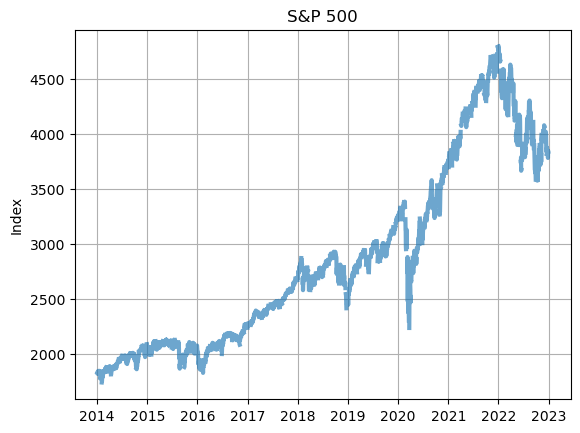

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sp500.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(sp500.title)
ax.set_ylabel(sp500.units);

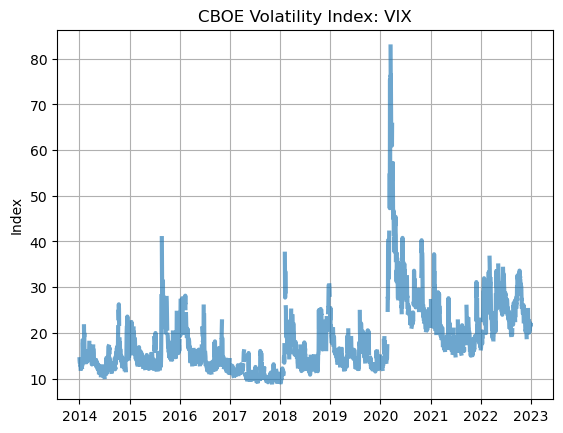

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(vix.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(vix.title)
ax.set_ylabel(vix.units);

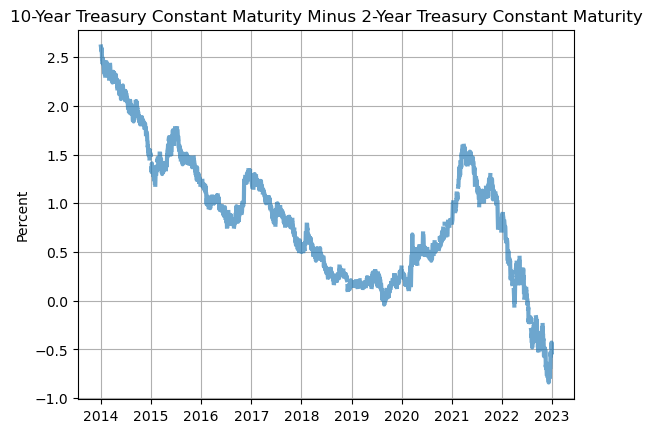

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(slope.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(slope.title)
ax.set_ylabel(slope.units);

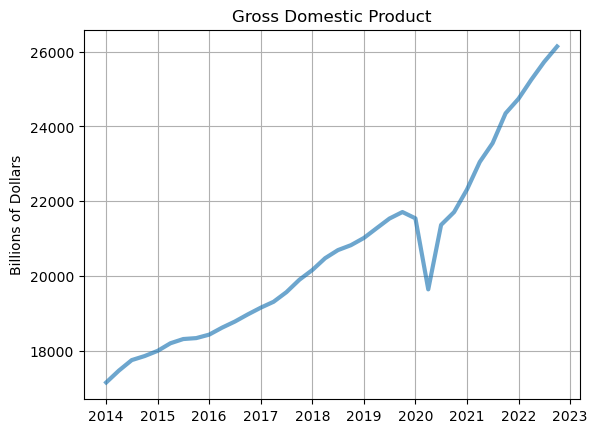

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gdp.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(gdp.title)
ax.set_ylabel(gdp.units);

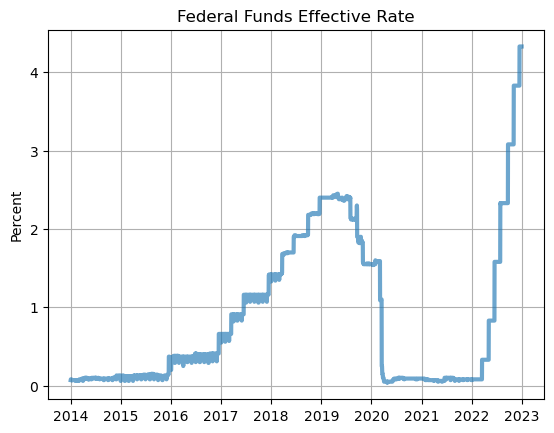

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fedfund_rate.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(fedfund_rate.title)
ax.set_ylabel(fedfund_rate.units);

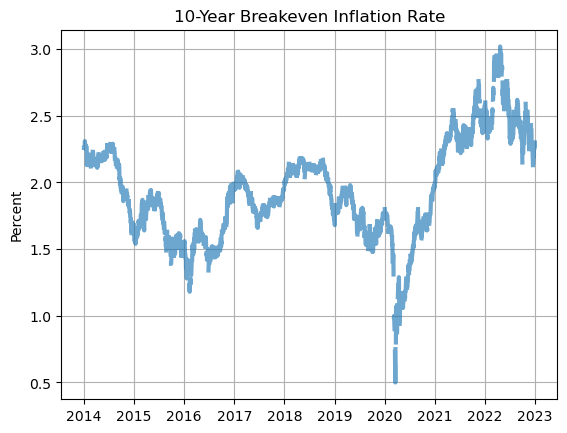

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(breakeven_inflation_rate.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(breakeven_inflation_rate.title)
ax.set_ylabel(breakeven_inflation_rate.units);

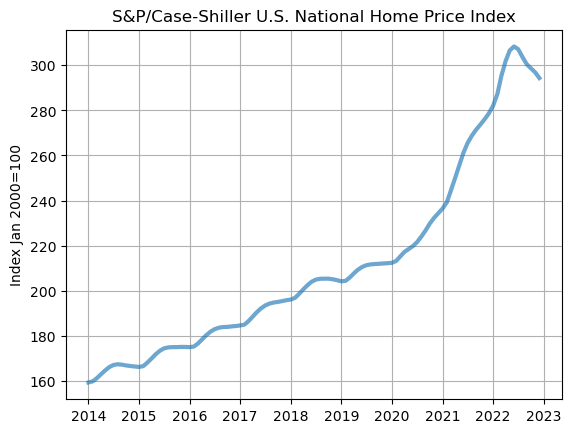

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(case_schiller_index.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(case_schiller_index.title)
ax.set_ylabel(case_schiller_index.units);

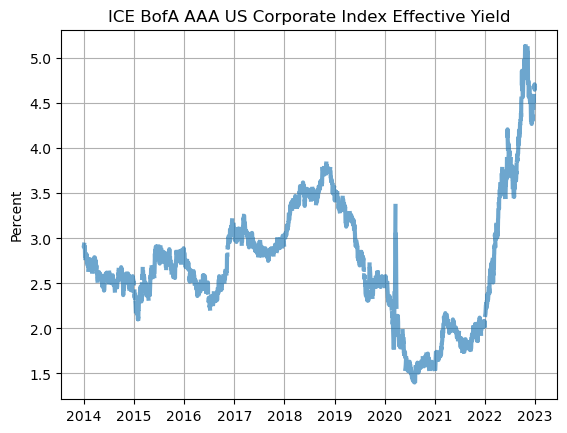

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(cb_spreads.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(cb_spreads.title)
ax.set_ylabel(cb_spreads.units);

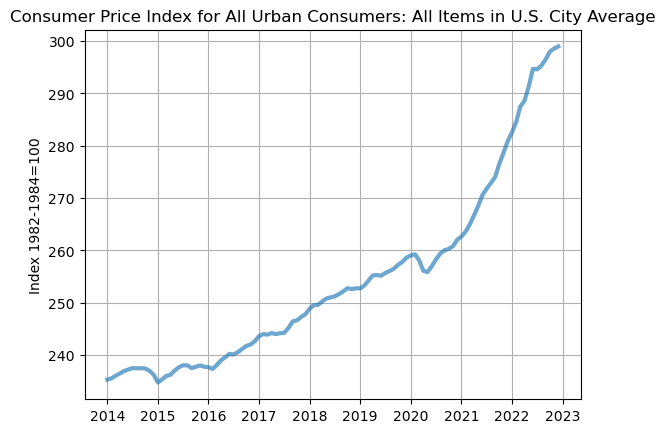

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(cpi.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(cpi.title)
ax.set_ylabel(cpi.units);

In [13]:
data = {'SP500': sp500.data,'Vix': vix.data, 'slope': slope.data,'GDP': gdp.data,'Fed fund rate': fedfund_rate.data, 'Breakeven inflation rate': breakeven_inflation_rate.data, 'House price index': case_schiller_index.data, 'US-AAA yield': cb_spreads.data,'CPI': cpi.data}


In [14]:
df = pd.DataFrame(data)
df

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,NaN,NaN,NaN,17144.281,0.07,NaN,159.37,NaN,235.288
2014-01-02,1831.98,14.23,2.61,NaN,0.08,2.26,NaN,2.92,NaN
2014-01-03,1831.37,13.76,2.60,NaN,0.08,2.26,NaN,2.93,NaN
2014-01-04,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,NaN,4.33,NaN,NaN,NaN,NaN
2022-12-27,3829.25,21.65,-0.48,NaN,4.33,2.26,NaN,4.68,NaN
2022-12-28,3783.22,22.14,-0.43,NaN,4.33,2.28,NaN,4.71,NaN


In [15]:
# interpolated dataframe 
df = pd.DataFrame(data)
df = df.interpolate(method='linear', axis=0).ffill().bfill()
df.head()

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,1831.980000,14.23,2.610000,17144.281000,0.07,2.26,159.370000,2.92,235.288000
2014-01-02,1831.980000,14.23,2.610000,17147.819022,0.08,2.26,159.386226,2.92,235.296355
2014-01-03,1831.370000,13.76,2.600000,17151.357044,0.08,2.26,159.402452,2.93,235.304710
2014-01-04,1829.836667,13.69,2.593333,17154.895067,0.08,2.26,159.418677,2.92,235.313065
2014-01-05,1828.303333,13.62,2.586667,17158.433089,0.08,2.26,159.434903,2.91,235.321419


<Axes: xlabel='date'>

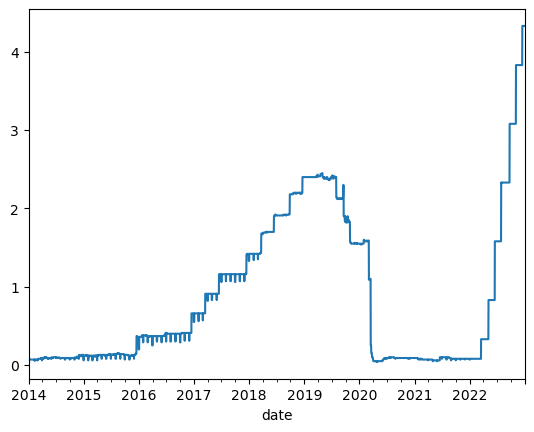

In [16]:
df["Fed fund rate"].plot()

# Linear regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
X = df[['SP500','Vix','slope','GDP','Fed fund rate','Breakeven inflation rate','House price index','CPI']]
y = df['US-AAA yield']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [19]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 5.09279037251307
betas = [-1.21064442e-03  2.93904379e-03 -1.51597877e-01 -7.50332970e-05
  4.68428060e-01  1.03854108e+00  2.94012201e-02 -2.32003496e-02]


In [20]:
Y_predicted = model.predict(X)

In [21]:
df['US-AAA yield OLS predicted' ] = Y_predicted

<Axes: xlabel='date'>

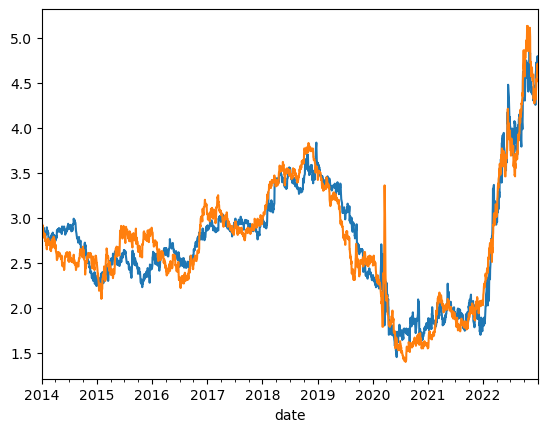

In [22]:
df["US-AAA yield OLS predicted"].plot() 
df["US-AAA yield"].plot() 


# Ai models

In [76]:
from keras.models import Sequential
from keras.layers import *
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

In [77]:
df_univariate = df["US-AAA yield"]

In [78]:
train, validate, test = np.split(df_univariate.sample(frac=1, random_state=None), [int(.7*len(df)), int(.9*len(df))])

In [79]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [138]:
n_steps = 30

# train
sequence_train = train.to_list()
X_train,Y_train = split_sequence(train, n_steps)

# test
sequence_test = test.to_list()
X_test,Y_test = split_sequence(test, n_steps)

# validate
sequence_validate = validate.to_list()
X_validate,Y_validate = split_sequence(validate, n_steps)


In [139]:
print(X_train)
print(Y_train)

[[2.78       2.76       1.91       ... 2.09       3.56       3.01      ]
 [2.76       1.91       3.73       ... 3.56       3.01       3.49      ]
 [1.91       3.73       2.11       ... 3.01       3.49       3.65      ]
 ...
 [3.53       2.69       2.44666667 ... 2.65       2.51       1.87      ]
 [2.69       2.44666667 2.75       ... 2.51       1.87       1.85      ]
 [2.44666667 2.75       2.33       ... 1.87       1.85       4.96666667]]
[3.49       3.65       2.74       ... 1.85       4.96666667 2.87      ]


Splitting the dataframe into train test and validate

In [140]:
n_features = 1

# define model
model = Sequential()
model.add(InputLayer((n_steps, n_features)))
model.add(GRU(64))
model.add(Dense(n_steps,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                12864     
                                                                 
 dense_22 (Dense)            (None, 21)                1365      
                                                                 
 dense_23 (Dense)            (None, 1)                 22        
                                                                 
Total params: 14,251
Trainable params: 14,251
Non-trainable params: 0
_________________________________________________________________


In [153]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300,  verbose=1, shuffle=False)

Epoch 1/300
72/72 [==============================] - 2s 9ms/step - loss: 0.1927 - root_mean_squared_error: 0.4389 - val_loss: 0.7020 - val_root_mean_squared_error: 0.8378
Epoch 2/300
72/72 [==============================] - 0s 6ms/step - loss: 0.1791 - root_mean_squared_error: 0.4233 - val_loss: 0.7166 - val_root_mean_squared_error: 0.8465
Epoch 3/300
72/72 [==============================] - 0s 6ms/step - loss: 0.1625 - root_mean_squared_error: 0.4031 - val_loss: 0.7132 - val_root_mean_squared_error: 0.8445
Epoch 4/300
72/72 [==============================] - 0s 6ms/step - loss: 0.1506 - root_mean_squared_error: 0.3881 - val_loss: 0.7169 - val_root_mean_squared_error: 0.8467
Epoch 5/300
72/72 [==============================] - 0s 6ms/step - loss: 0.1444 - root_mean_squared_error: 0.3800 - val_loss: 0.7232 - val_root_mean_squared_error: 0.8504
Epoch 6/300
72/72 [==============================] - 0s 6ms/step - loss: 0.1359 - root_mean_squared_error: 0.3686 - val_loss: 0.7277 - val_root_m

Epoch 49/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0614 - root_mean_squared_error: 0.2478 - val_loss: 0.8373 - val_root_mean_squared_error: 0.9150
Epoch 50/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0656 - root_mean_squared_error: 0.2562 - val_loss: 0.8182 - val_root_mean_squared_error: 0.9045
Epoch 51/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0610 - root_mean_squared_error: 0.2470 - val_loss: 0.8302 - val_root_mean_squared_error: 0.9111
Epoch 52/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0592 - root_mean_squared_error: 0.2433 - val_loss: 0.8414 - val_root_mean_squared_error: 0.9173
Epoch 53/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0608 - root_mean_squared_error: 0.2465 - val_loss: 0.8490 - val_root_mean_squared_error: 0.9214
Epoch 54/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0638 - root_mean_squared_error: 0.2525 - val_loss: 0.8605 - val_

72/72 [==============================] - 0s 5ms/step - loss: 0.0524 - root_mean_squared_error: 0.2289 - val_loss: 0.8786 - val_root_mean_squared_error: 0.9374
Epoch 97/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0526 - root_mean_squared_error: 0.2293 - val_loss: 0.8880 - val_root_mean_squared_error: 0.9423
Epoch 98/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0506 - root_mean_squared_error: 0.2249 - val_loss: 0.8900 - val_root_mean_squared_error: 0.9434
Epoch 99/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0505 - root_mean_squared_error: 0.2246 - val_loss: 0.8947 - val_root_mean_squared_error: 0.9459
Epoch 100/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0495 - root_mean_squared_error: 0.2224 - val_loss: 0.8939 - val_root_mean_squared_error: 0.9455
Epoch 101/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0514 - root_mean_squared_error: 0.2268 - val_loss: 0.8822 - val_root_mean_s

72/72 [==============================] - 0s 5ms/step - loss: 0.0205 - root_mean_squared_error: 0.1433 - val_loss: 0.8496 - val_root_mean_squared_error: 0.9217
Epoch 144/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0202 - root_mean_squared_error: 0.1422 - val_loss: 0.8601 - val_root_mean_squared_error: 0.9274
Epoch 145/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0196 - root_mean_squared_error: 0.1401 - val_loss: 0.8722 - val_root_mean_squared_error: 0.9339
Epoch 146/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0207 - root_mean_squared_error: 0.1440 - val_loss: 0.8503 - val_root_mean_squared_error: 0.9221
Epoch 147/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0199 - root_mean_squared_error: 0.1410 - val_loss: 0.8531 - val_root_mean_squared_error: 0.9236
Epoch 148/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0195 - root_mean_squared_error: 0.1396 - val_loss: 0.8486 - val_root_mea

72/72 [==============================] - 0s 5ms/step - loss: 0.0173 - root_mean_squared_error: 0.1314 - val_loss: 0.8825 - val_root_mean_squared_error: 0.9394
Epoch 191/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0183 - root_mean_squared_error: 0.1352 - val_loss: 0.8781 - val_root_mean_squared_error: 0.9371
Epoch 192/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0211 - root_mean_squared_error: 0.1453 - val_loss: 0.8769 - val_root_mean_squared_error: 0.9365
Epoch 193/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0210 - root_mean_squared_error: 0.1450 - val_loss: 0.8560 - val_root_mean_squared_error: 0.9252
Epoch 194/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0260 - root_mean_squared_error: 0.1612 - val_loss: 0.8692 - val_root_mean_squared_error: 0.9323
Epoch 195/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0292 - root_mean_squared_error: 0.1708 - val_loss: 0.8486 - val_root_mea

72/72 [==============================] - 0s 5ms/step - loss: 0.0148 - root_mean_squared_error: 0.1216 - val_loss: 0.9481 - val_root_mean_squared_error: 0.9737
Epoch 238/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0135 - root_mean_squared_error: 0.1164 - val_loss: 0.9428 - val_root_mean_squared_error: 0.9710
Epoch 239/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0135 - root_mean_squared_error: 0.1164 - val_loss: 0.9527 - val_root_mean_squared_error: 0.9761
Epoch 240/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0144 - root_mean_squared_error: 0.1200 - val_loss: 0.9615 - val_root_mean_squared_error: 0.9806
Epoch 241/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0144 - root_mean_squared_error: 0.1201 - val_loss: 0.9796 - val_root_mean_squared_error: 0.9898
Epoch 242/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0142 - root_mean_squared_error: 0.1191 - val_loss: 0.9978 - val_root_mea

72/72 [==============================] - 0s 5ms/step - loss: 0.0158 - root_mean_squared_error: 0.1257 - val_loss: 0.8705 - val_root_mean_squared_error: 0.9330
Epoch 285/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0169 - root_mean_squared_error: 0.1300 - val_loss: 0.8801 - val_root_mean_squared_error: 0.9381
Epoch 286/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0175 - root_mean_squared_error: 0.1324 - val_loss: 0.8867 - val_root_mean_squared_error: 0.9416
Epoch 287/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0185 - root_mean_squared_error: 0.1361 - val_loss: 0.8780 - val_root_mean_squared_error: 0.9370
Epoch 288/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0207 - root_mean_squared_error: 0.1437 - val_loss: 0.8780 - val_root_mean_squared_error: 0.9370
Epoch 289/300
72/72 [==============================] - 0s 5ms/step - loss: 0.0214 - root_mean_squared_error: 0.1463 - val_loss: 0.8800 - val_root_mea

In [154]:
# demonstrate prediction
Y_hat = model.predict(X_validate, verbose=0)


[3.0550005 2.2852335 2.3851528 2.4291914 1.8126503 1.6187209 2.6931984
 1.8063551 2.3006594 2.0983596 2.356959  2.2456057 2.5663521 3.034895
 2.5405564 2.5883682 2.3096967 2.6658096 2.4301007 2.384248  3.3337033
 2.8871841 1.9719073 1.9395155 1.628786  2.3414426 2.2453725 2.453544
 2.4993134 2.3211331 2.9607718 1.7759321 2.888586  1.9900446 2.1762817
 3.7695084 1.4541453 2.4056497 2.8523784 1.863391  1.4688632 2.9614487
 2.751812  3.3376071 3.1306808 2.2717779 2.1766524 2.0964837 2.2876697
 2.502973  1.973513  2.106866  2.3322632 2.8851037 2.0423877 1.6145643
 2.025741  2.482764  1.8358    1.9484686 3.5352333 3.085758  1.7314609
 2.1573467 2.32088   2.388221  3.2741077 1.6962782 2.7410686 2.4297478
 1.6608155 2.3958142 2.4843776 2.5611653 2.6829572 1.3172493 2.136235
 1.9665222 2.2726028 2.7805612 2.1090882 3.1910155 2.794456  3.3319068
 1.6625968 3.417548  1.6281565 1.7278092 2.1523995 1.7792864 2.394299
 1.5612589 3.1006947 1.3564888 2.6893904 2.6256826 2.837157  3.1169283
 2.841003 

In [159]:
train_results = pd.DataFrame(data={'Train Predictions':Y_hat.flatten(),'Actuals':Y_validate})
train_results

,Train Predictions,Actuals
0,3.055001,3.800000
1,2.285233,1.620000
2,2.385153,2.570000
3,2.429191,1.630000
4,1.812650,2.020000
...,...,...
631,1.872179,1.840000
632,2.772853,2.466667
633,2.570035,2.790000
634,1.744311,2.023333


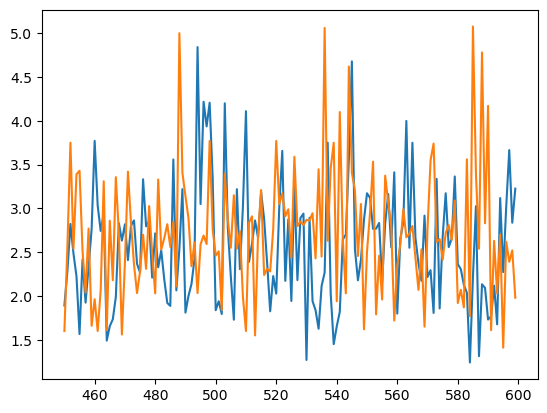

In [160]:
plt.plot(train_results['Train Predictions'][450:600])
plt.plot(train_results['Actuals'][450:600])

In [304]:
n_steps = 30
# train
sequence_train = train.to_list()
X_train,Y_train = split_sequence(train, n_steps)

# test
sequence_test = test.to_list()
X_test,Y_test = split_sequence(test, n_steps)

# validate
sequence_validate = validate.to_list()
X_validate,Y_validate = split_sequence(validate, n_steps)

In [321]:
n_features = 1

# define model
model1 = Sequential()
model1.add(InputLayer((n_steps, n_features)))
model1.add(Conv1D(64,kernel_size=2))
model1.add(Flatten())
model1.add(Dense(n_steps,'relu'))
model1.add(Dense(1,'linear'))

model1.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 20, 64)            192       
                                                                 
 flatten_24 (Flatten)        (None, 1280)              0         
                                                                 
 dense_70 (Dense)            (None, 21)                26901     
                                                                 
 dense_71 (Dense)            (None, 1)                 22        
                                                                 
Total params: 27,115
Trainable params: 27,115
Non-trainable params: 0
_________________________________________________________________


In [322]:
model1.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500,  verbose=1, shuffle=False)

Epoch 1/500
72/72 [==============================] - 0s 2ms/step - loss: 1.2726 - root_mean_squared_error: 1.1281 - val_loss: 0.5370 - val_root_mean_squared_error: 0.7328
Epoch 2/500
72/72 [==============================] - 0s 1ms/step - loss: 0.5091 - root_mean_squared_error: 0.7135 - val_loss: 0.5229 - val_root_mean_squared_error: 0.7231
Epoch 3/500
72/72 [==============================] - 0s 1ms/step - loss: 0.5017 - root_mean_squared_error: 0.7083 - val_loss: 0.5146 - val_root_mean_squared_error: 0.7173
Epoch 4/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4966 - root_mean_squared_error: 0.7047 - val_loss: 0.5107 - val_root_mean_squared_error: 0.7146
Epoch 5/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4934 - root_mean_squared_error: 0.7024 - val_loss: 0.5093 - val_root_mean_squared_error: 0.7136
Epoch 6/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4914 - root_mean_squared_error: 0.7010 - val_loss: 0.5079 - val_root_m

Epoch 49/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4781 - root_mean_squared_error: 0.6915 - val_loss: 0.4999 - val_root_mean_squared_error: 0.7070
Epoch 50/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4777 - root_mean_squared_error: 0.6912 - val_loss: 0.4998 - val_root_mean_squared_error: 0.7070
Epoch 51/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4774 - root_mean_squared_error: 0.6909 - val_loss: 0.4995 - val_root_mean_squared_error: 0.7067
Epoch 52/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4774 - root_mean_squared_error: 0.6909 - val_loss: 0.4993 - val_root_mean_squared_error: 0.7066
Epoch 53/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4769 - root_mean_squared_error: 0.6906 - val_loss: 0.4992 - val_root_mean_squared_error: 0.7066
Epoch 54/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4769 - root_mean_squared_error: 0.6906 - val_loss: 0.4994 - val_

72/72 [==============================] - 0s 1ms/step - loss: 0.4683 - root_mean_squared_error: 0.6843 - val_loss: 0.5025 - val_root_mean_squared_error: 0.7089
Epoch 97/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4678 - root_mean_squared_error: 0.6840 - val_loss: 0.5029 - val_root_mean_squared_error: 0.7091
Epoch 98/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4672 - root_mean_squared_error: 0.6835 - val_loss: 0.5032 - val_root_mean_squared_error: 0.7094
Epoch 99/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4674 - root_mean_squared_error: 0.6837 - val_loss: 0.5031 - val_root_mean_squared_error: 0.7093
Epoch 100/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4666 - root_mean_squared_error: 0.6831 - val_loss: 0.5035 - val_root_mean_squared_error: 0.7095
Epoch 101/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4674 - root_mean_squared_error: 0.6837 - val_loss: 0.5042 - val_root_mean_s

72/72 [==============================] - 0s 1ms/step - loss: 0.4614 - root_mean_squared_error: 0.6793 - val_loss: 0.5138 - val_root_mean_squared_error: 0.7168
Epoch 144/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4625 - root_mean_squared_error: 0.6801 - val_loss: 0.5133 - val_root_mean_squared_error: 0.7165
Epoch 145/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4616 - root_mean_squared_error: 0.6794 - val_loss: 0.5145 - val_root_mean_squared_error: 0.7173
Epoch 146/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4614 - root_mean_squared_error: 0.6792 - val_loss: 0.5148 - val_root_mean_squared_error: 0.7175
Epoch 147/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4615 - root_mean_squared_error: 0.6793 - val_loss: 0.5142 - val_root_mean_squared_error: 0.7171
Epoch 148/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4611 - root_mean_squared_error: 0.6791 - val_loss: 0.5154 - val_root_mea

72/72 [==============================] - 0s 1ms/step - loss: 0.4569 - root_mean_squared_error: 0.6760 - val_loss: 0.5241 - val_root_mean_squared_error: 0.7239
Epoch 191/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4569 - root_mean_squared_error: 0.6759 - val_loss: 0.5252 - val_root_mean_squared_error: 0.7247
Epoch 192/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4566 - root_mean_squared_error: 0.6757 - val_loss: 0.5253 - val_root_mean_squared_error: 0.7248
Epoch 193/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4565 - root_mean_squared_error: 0.6756 - val_loss: 0.5262 - val_root_mean_squared_error: 0.7254
Epoch 194/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4564 - root_mean_squared_error: 0.6756 - val_loss: 0.5257 - val_root_mean_squared_error: 0.7251
Epoch 195/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4563 - root_mean_squared_error: 0.6755 - val_loss: 0.5262 - val_root_mea

72/72 [==============================] - 0s 1ms/step - loss: 0.4522 - root_mean_squared_error: 0.6724 - val_loss: 0.5327 - val_root_mean_squared_error: 0.7298
Epoch 238/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4519 - root_mean_squared_error: 0.6722 - val_loss: 0.5341 - val_root_mean_squared_error: 0.7308
Epoch 239/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4520 - root_mean_squared_error: 0.6723 - val_loss: 0.5346 - val_root_mean_squared_error: 0.7312
Epoch 240/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4520 - root_mean_squared_error: 0.6723 - val_loss: 0.5325 - val_root_mean_squared_error: 0.7297
Epoch 241/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4518 - root_mean_squared_error: 0.6721 - val_loss: 0.5348 - val_root_mean_squared_error: 0.7313
Epoch 242/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4518 - root_mean_squared_error: 0.6722 - val_loss: 0.5357 - val_root_mea

72/72 [==============================] - 0s 1ms/step - loss: 0.4492 - root_mean_squared_error: 0.6702 - val_loss: 0.5449 - val_root_mean_squared_error: 0.7382
Epoch 285/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4494 - root_mean_squared_error: 0.6704 - val_loss: 0.5454 - val_root_mean_squared_error: 0.7385
Epoch 286/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4491 - root_mean_squared_error: 0.6702 - val_loss: 0.5462 - val_root_mean_squared_error: 0.7391
Epoch 287/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4492 - root_mean_squared_error: 0.6702 - val_loss: 0.5436 - val_root_mean_squared_error: 0.7373
Epoch 288/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4489 - root_mean_squared_error: 0.6700 - val_loss: 0.5452 - val_root_mean_squared_error: 0.7383
Epoch 289/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4489 - root_mean_squared_error: 0.6700 - val_loss: 0.5468 - val_root_mea

72/72 [==============================] - 0s 1ms/step - loss: 0.4466 - root_mean_squared_error: 0.6683 - val_loss: 0.5490 - val_root_mean_squared_error: 0.7410
Epoch 332/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4464 - root_mean_squared_error: 0.6681 - val_loss: 0.5506 - val_root_mean_squared_error: 0.7420
Epoch 333/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4463 - root_mean_squared_error: 0.6681 - val_loss: 0.5515 - val_root_mean_squared_error: 0.7426
Epoch 334/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4463 - root_mean_squared_error: 0.6681 - val_loss: 0.5506 - val_root_mean_squared_error: 0.7421
Epoch 335/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4463 - root_mean_squared_error: 0.6680 - val_loss: 0.5506 - val_root_mean_squared_error: 0.7420
Epoch 336/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4462 - root_mean_squared_error: 0.6680 - val_loss: 0.5511 - val_root_mea

72/72 [==============================] - 0s 1ms/step - loss: 0.4433 - root_mean_squared_error: 0.6658 - val_loss: 0.5543 - val_root_mean_squared_error: 0.7445
Epoch 379/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4440 - root_mean_squared_error: 0.6664 - val_loss: 0.5549 - val_root_mean_squared_error: 0.7449
Epoch 380/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4433 - root_mean_squared_error: 0.6658 - val_loss: 0.5558 - val_root_mean_squared_error: 0.7455
Epoch 381/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4434 - root_mean_squared_error: 0.6659 - val_loss: 0.5551 - val_root_mean_squared_error: 0.7450
Epoch 382/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4430 - root_mean_squared_error: 0.6656 - val_loss: 0.5561 - val_root_mean_squared_error: 0.7457
Epoch 383/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4429 - root_mean_squared_error: 0.6655 - val_loss: 0.5531 - val_root_mea

72/72 [==============================] - 0s 1ms/step - loss: 0.4410 - root_mean_squared_error: 0.6641 - val_loss: 0.5575 - val_root_mean_squared_error: 0.7467
Epoch 426/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4408 - root_mean_squared_error: 0.6639 - val_loss: 0.5593 - val_root_mean_squared_error: 0.7479
Epoch 427/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4406 - root_mean_squared_error: 0.6638 - val_loss: 0.5589 - val_root_mean_squared_error: 0.7476
Epoch 428/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4406 - root_mean_squared_error: 0.6638 - val_loss: 0.5598 - val_root_mean_squared_error: 0.7482
Epoch 429/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4405 - root_mean_squared_error: 0.6637 - val_loss: 0.5604 - val_root_mean_squared_error: 0.7486
Epoch 430/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4406 - root_mean_squared_error: 0.6638 - val_loss: 0.5611 - val_root_mea

72/72 [==============================] - 0s 1ms/step - loss: 0.4385 - root_mean_squared_error: 0.6622 - val_loss: 0.5644 - val_root_mean_squared_error: 0.7513
Epoch 473/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4384 - root_mean_squared_error: 0.6621 - val_loss: 0.5640 - val_root_mean_squared_error: 0.7510
Epoch 474/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4384 - root_mean_squared_error: 0.6621 - val_loss: 0.5640 - val_root_mean_squared_error: 0.7510
Epoch 475/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4387 - root_mean_squared_error: 0.6623 - val_loss: 0.5644 - val_root_mean_squared_error: 0.7513
Epoch 476/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4384 - root_mean_squared_error: 0.6621 - val_loss: 0.5641 - val_root_mean_squared_error: 0.7510
Epoch 477/500
72/72 [==============================] - 0s 1ms/step - loss: 0.4388 - root_mean_squared_error: 0.6624 - val_loss: 0.5643 - val_root_mea

In [323]:
# demonstrate prediction
Y_hat1 = model1.predict(X_validate, verbose=0)


In [318]:
train_results = pd.DataFrame(data={'Train Predictions':Y_hat1.flatten(),'Actuals':Y_validate})
train_results

,Train Predictions,Actuals
0,2.807708,3.480000
1,2.846877,1.646667
2,2.853008,2.620000
3,2.819822,2.380000
4,2.809294,2.803333
...,...,...
592,2.752127,1.840000
593,2.734057,2.466667
594,2.691552,2.790000
595,2.716702,2.023333


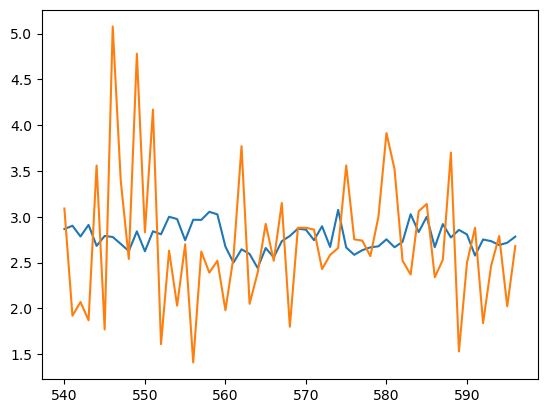

In [319]:
plt.plot(train_results['Train Predictions'][540:])
plt.plot(train_results['Actuals'][540:])

In [350]:
df1=df[['SP500','Vix','slope',  'GDP','Fed fund rate',  'CPI',  'US-AAA yield']] #Breakeven inflation rate',  'House price index', 'CPI' 'US-AAA yield']


array([[ 1.83198000e+03,  1.42300000e+01,  2.61000000e+00, ...,
         7.00000000e-02,  2.35288000e+02,  2.92000000e+00],
       [ 1.83198000e+03,  1.42300000e+01,  2.61000000e+00, ...,
         8.00000000e-02,  2.35296355e+02,  2.92000000e+00],
       [ 1.83137000e+03,  1.37600000e+01,  2.60000000e+00, ...,
         8.00000000e-02,  2.35304710e+02,  2.93000000e+00],
       ...,
       [ 3.78322000e+03,  2.21400000e+01, -4.30000000e-01, ...,
         4.33000000e+00,  2.98990000e+02,  4.71000000e+00],
       [ 3.84928000e+03,  2.14400000e+01, -5.10000000e-01, ...,
         4.33000000e+00,  2.98990000e+02,  4.65000000e+00],
       [ 3.83950000e+03,  2.16700000e+01, -5.30000000e-01, ...,
         4.33000000e+00,  2.98990000e+02,  4.67000000e+00]])

##  Multivariate regression


In [399]:
def df_to_X_y2(df,window_size):
    df_as_np = df
    X = []
    Y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][6]
        Y.append(label)
        
    return np.array(X), np.array(Y)
    

In [400]:
from sklearn.preprocessing import StandardScaler

In [401]:
# define min max scaler
scaler = StandardScaler()
# transform data
df_scaled = scaler.fit_transform(df1)


In [466]:
df_scaled
n_steps = 30

In [467]:
x2,y2 = df_to_X_y2(df_scaled,n_steps)


In [468]:
x2.shape, y2.shape

((3256, 30, 7), (3256,))

In [469]:
x2_train, y2_train = x2[:2500], y2[:2500]
x2_val, y2_val = x2[2500:3000], y2[2500:3000]
x2_test, y2_test = x2[3000:],y2[3000:]



In [470]:
x2_train.shape, y2_train.shape, x2_val.shape, y2_val.shape, x2_test.shape, y2_test.shape

((2500, 30, 7), (2500,), (500, 30, 7), (500,), (256, 30, 7), (256,))

In [501]:
n_features = 7

# define model
model2 = Sequential()
model2.add(InputLayer((n_steps, n_features)))
model2.add(GRU(64))
model2.add(Dense(n_steps,'relu'))
model2.add(Dense(1,'linear'))

model2.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_16 (GRU)                (None, 90)                26730     
                                                                 
 dense_99 (Dense)            (None, 30)                2730      
                                                                 
 dense_100 (Dense)           (None, 1)                 31        
                                                                 
Total params: 29,491
Trainable params: 29,491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model2.fit(x2_train, y2_train, validation_data=(x2_val, y2_val), epochs=500,  verbose=1, shuffle=False)

Epoch 1/500
79/79 [==============================] - 2s 14ms/step - loss: 0.0039 - root_mean_squared_error: 0.0621 - val_loss: 0.1349 - val_root_mean_squared_error: 0.3673
Epoch 2/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0039 - root_mean_squared_error: 0.0622 - val_loss: 0.1083 - val_root_mean_squared_error: 0.3291
Epoch 3/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0035 - root_mean_squared_error: 0.0596 - val_loss: 0.1207 - val_root_mean_squared_error: 0.3474
Epoch 4/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0036 - root_mean_squared_error: 0.0600 - val_loss: 0.1215 - val_root_mean_squared_error: 0.3486
Epoch 5/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0040 - root_mean_squared_error: 0.0629 - val_loss: 0.0960 - val_root_mean_squared_error: 0.3098
Epoch 6/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0039 - root_mean_squared_error: 0.0621 - val_loss: 0.1120 - val_

79/79 [==============================] - 1s 11ms/step - loss: 0.0051 - root_mean_squared_error: 0.0711 - val_loss: 0.1021 - val_root_mean_squared_error: 0.3195
Epoch 49/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0041 - root_mean_squared_error: 0.0642 - val_loss: 0.1446 - val_root_mean_squared_error: 0.3802
Epoch 50/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0043 - root_mean_squared_error: 0.0657 - val_loss: 0.1056 - val_root_mean_squared_error: 0.3249
Epoch 51/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0037 - root_mean_squared_error: 0.0606 - val_loss: 0.1411 - val_root_mean_squared_error: 0.3756
Epoch 52/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0038 - root_mean_squared_error: 0.0619 - val_loss: 0.1089 - val_root_mean_squared_error: 0.3300
Epoch 53/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0034 - root_mean_squared_error: 0.0582 - val_loss: 0.1391 - val_root_me

79/79 [==============================] - 1s 11ms/step - loss: 0.0043 - root_mean_squared_error: 0.0655 - val_loss: 0.1285 - val_root_mean_squared_error: 0.3585
Epoch 96/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0046 - root_mean_squared_error: 0.0681 - val_loss: 0.0901 - val_root_mean_squared_error: 0.3002
Epoch 97/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0041 - root_mean_squared_error: 0.0640 - val_loss: 0.1268 - val_root_mean_squared_error: 0.3562
Epoch 98/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0043 - root_mean_squared_error: 0.0654 - val_loss: 0.0907 - val_root_mean_squared_error: 0.3011
Epoch 99/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0039 - root_mean_squared_error: 0.0621 - val_loss: 0.1244 - val_root_mean_squared_error: 0.3528
Epoch 100/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0039 - root_mean_squared_error: 0.0625 - val_loss: 0.0913 - val_root_m

79/79 [==============================] - 1s 11ms/step - loss: 0.0035 - root_mean_squared_error: 0.0595 - val_loss: 0.0767 - val_root_mean_squared_error: 0.2769
Epoch 143/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0033 - root_mean_squared_error: 0.0573 - val_loss: 0.1014 - val_root_mean_squared_error: 0.3185
Epoch 144/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0034 - root_mean_squared_error: 0.0587 - val_loss: 0.0758 - val_root_mean_squared_error: 0.2753
Epoch 145/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0034 - root_mean_squared_error: 0.0579 - val_loss: 0.1006 - val_root_mean_squared_error: 0.3172
Epoch 146/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0035 - root_mean_squared_error: 0.0589 - val_loss: 0.0750 - val_root_mean_squared_error: 0.2739
Epoch 147/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0033 - root_mean_squared_error: 0.0571 - val_loss: 0.0995 - val_ro

79/79 [==============================] - 1s 11ms/step - loss: 0.0031 - root_mean_squared_error: 0.0554 - val_loss: 0.0897 - val_root_mean_squared_error: 0.2994
Epoch 190/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0032 - root_mean_squared_error: 0.0567 - val_loss: 0.0667 - val_root_mean_squared_error: 0.2582
Epoch 191/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0030 - root_mean_squared_error: 0.0552 - val_loss: 0.0894 - val_root_mean_squared_error: 0.2990
Epoch 192/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0032 - root_mean_squared_error: 0.0563 - val_loss: 0.0672 - val_root_mean_squared_error: 0.2592
Epoch 193/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0030 - root_mean_squared_error: 0.0549 - val_loss: 0.0895 - val_root_mean_squared_error: 0.2992
Epoch 194/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0032 - root_mean_squared_error: 0.0561 - val_loss: 0.0669 - val_ro

79/79 [==============================] - 1s 11ms/step - loss: 0.0029 - root_mean_squared_error: 0.0543 - val_loss: 0.0632 - val_root_mean_squared_error: 0.2514
Epoch 237/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0029 - root_mean_squared_error: 0.0540 - val_loss: 0.0856 - val_root_mean_squared_error: 0.2925
Epoch 238/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0030 - root_mean_squared_error: 0.0544 - val_loss: 0.0634 - val_root_mean_squared_error: 0.2519
Epoch 239/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 0.0852 - val_root_mean_squared_error: 0.2919
Epoch 240/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0029 - root_mean_squared_error: 0.0541 - val_loss: 0.0637 - val_root_mean_squared_error: 0.2524
Epoch 241/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0028 - root_mean_squared_error: 0.0534 - val_loss: 0.0856 - val_ro

79/79 [==============================] - 1s 11ms/step - loss: 0.0028 - root_mean_squared_error: 0.0526 - val_loss: 0.0802 - val_root_mean_squared_error: 0.2831
Epoch 284/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537 - val_loss: 0.0593 - val_root_mean_squared_error: 0.2436
Epoch 285/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0802 - val_root_mean_squared_error: 0.2832
Epoch 286/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0028 - root_mean_squared_error: 0.0533 - val_loss: 0.0593 - val_root_mean_squared_error: 0.2436
Epoch 287/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0027 - root_mean_squared_error: 0.0519 - val_loss: 0.0801 - val_root_mean_squared_error: 0.2830
Epoch 288/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537 - val_loss: 0.0589 - val_ro

79/79 [==============================] - 1s 11ms/step - loss: 0.0028 - root_mean_squared_error: 0.0525 - val_loss: 0.0548 - val_root_mean_squared_error: 0.2341
Epoch 331/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0026 - root_mean_squared_error: 0.0506 - val_loss: 0.0722 - val_root_mean_squared_error: 0.2687
Epoch 332/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0027 - root_mean_squared_error: 0.0523 - val_loss: 0.0543 - val_root_mean_squared_error: 0.2329
Epoch 333/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512 - val_loss: 0.0709 - val_root_mean_squared_error: 0.2663
Epoch 334/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0026 - root_mean_squared_error: 0.0515 - val_loss: 0.0527 - val_root_mean_squared_error: 0.2295
Epoch 335/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512 - val_loss: 0.0707 - val_ro

79/79 [==============================] - 1s 11ms/step - loss: 0.0025 - root_mean_squared_error: 0.0500 - val_loss: 0.0640 - val_root_mean_squared_error: 0.2529
Epoch 378/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0025 - root_mean_squared_error: 0.0501 - val_loss: 0.0480 - val_root_mean_squared_error: 0.2191
Epoch 379/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0025 - root_mean_squared_error: 0.0502 - val_loss: 0.0629 - val_root_mean_squared_error: 0.2509
Epoch 380/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0027 - root_mean_squared_error: 0.0518 - val_loss: 0.0489 - val_root_mean_squared_error: 0.2211
Epoch 381/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0024 - root_mean_squared_error: 0.0490 - val_loss: 0.0642 - val_root_mean_squared_error: 0.2533
Epoch 382/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512 - val_loss: 0.0495 - val_ro

79/79 [==============================] - 1s 11ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512 - val_loss: 0.0464 - val_root_mean_squared_error: 0.2154
Epoch 425/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0023 - root_mean_squared_error: 0.0481 - val_loss: 0.0597 - val_root_mean_squared_error: 0.2444
Epoch 426/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0025 - root_mean_squared_error: 0.0501 - val_loss: 0.0459 - val_root_mean_squared_error: 0.2142
Epoch 427/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0025 - root_mean_squared_error: 0.0496 - val_loss: 0.0586 - val_root_mean_squared_error: 0.2420
Epoch 428/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0024 - root_mean_squared_error: 0.0486 - val_loss: 0.0457 - val_root_mean_squared_error: 0.2137
Epoch 429/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0024 - root_mean_squared_error: 0.0488 - val_loss: 0.0577 - val_ro

79/79 [==============================] - 1s 11ms/step - loss: 0.0024 - root_mean_squared_error: 0.0485 - val_loss: 0.0534 - val_root_mean_squared_error: 0.2312
Epoch 472/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 0.0436 - val_root_mean_squared_error: 0.2087
Epoch 473/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0022 - root_mean_squared_error: 0.0472 - val_loss: 0.0540 - val_root_mean_squared_error: 0.2325
Epoch 474/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0023 - root_mean_squared_error: 0.0478 - val_loss: 0.0427 - val_root_mean_squared_error: 0.2066
Epoch 475/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0024 - root_mean_squared_error: 0.0491 - val_loss: 0.0529 - val_root_mean_squared_error: 0.2299
Epoch 476/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0024 - root_mean_squared_error: 0.0487 - val_loss: 0.0431 - val_ro

In [503]:
# demonstrate prediction
Y_hat1 = model2.predict(x2_val, verbose=0)


In [504]:
train_results = pd.DataFrame(data={'Train Predictions':Y_hat1.flatten(),'Actuals':y2_val})
train_results

,Train Predictions,Actuals
0,-1.634036,-1.628242
1,-1.627974,-1.642768
2,-1.627819,-1.657293
3,-1.631603,-1.671819
4,-1.638679,-1.599191
...,...,...
495,0.011846,1.015403
496,0.053953,1.029929
497,0.086537,1.044454
498,0.113518,1.058980


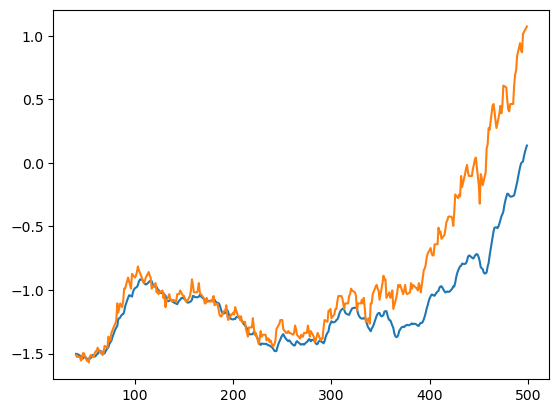

In [505]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])

In [471]:
n_features = 7

# define model
model3 = Sequential()
model3.add(InputLayer((n_steps, n_features)))
model3.add(Conv1D(64,kernel_size=2))
model3.add(Flatten())
model3.add(Dense(n_steps,'relu'))
model3.add(Dense(1,'linear'))

model3.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_29 (Conv1D)          (None, 29, 64)            960       
                                                                 
 flatten_28 (Flatten)        (None, 1856)              0         
                                                                 
 dense_95 (Dense)            (None, 30)                55710     
                                                                 
 dense_96 (Dense)            (None, 1)                 31        
                                                                 
Total params: 56,701
Trainable params: 56,701
Non-trainable params: 0
_________________________________________________________________


In [488]:
model3.compile(optimizer=Adam(learning_rate=0.00001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model3.fit(x2_train, y2_train, validation_data=(x2_val, y2_val), epochs=80,  verbose=1, shuffle=False)

Epoch 1/80
79/79 [==============================] - 0s 2ms/step - loss: 0.0044 - root_mean_squared_error: 0.0660 - val_loss: 0.0939 - val_root_mean_squared_error: 0.3064
Epoch 2/80
79/79 [==============================] - 0s 1ms/step - loss: 0.0023 - root_mean_squared_error: 0.0477 - val_loss: 0.0970 - val_root_mean_squared_error: 0.3115
Epoch 3/80
79/79 [==============================] - 0s 1ms/step - loss: 0.0019 - root_mean_squared_error: 0.0436 - val_loss: 0.1096 - val_root_mean_squared_error: 0.3310
Epoch 4/80
79/79 [==============================] - 0s 1ms/step - loss: 0.0017 - root_mean_squared_error: 0.0417 - val_loss: 0.1179 - val_root_mean_squared_error: 0.3434
Epoch 5/80
79/79 [==============================] - 0s 1ms/step - loss: 0.0017 - root_mean_squared_error: 0.0409 - val_loss: 0.1193 - val_root_mean_squared_error: 0.3454
Epoch 6/80
79/79 [==============================] - 0s 1ms/step - loss: 0.0016 - root_mean_squared_error: 0.0405 - val_loss: 0.1144 - val_root_mean_sq

Epoch 49/80
79/79 [==============================] - 0s 1ms/step - loss: 0.0016 - root_mean_squared_error: 0.0399 - val_loss: 0.1192 - val_root_mean_squared_error: 0.3453
Epoch 50/80
79/79 [==============================] - 0s 1ms/step - loss: 0.0016 - root_mean_squared_error: 0.0399 - val_loss: 0.1179 - val_root_mean_squared_error: 0.3433
Epoch 51/80
79/79 [==============================] - 0s 1ms/step - loss: 0.0016 - root_mean_squared_error: 0.0398 - val_loss: 0.1230 - val_root_mean_squared_error: 0.3508
Epoch 52/80
79/79 [==============================] - 0s 1ms/step - loss: 0.0016 - root_mean_squared_error: 0.0399 - val_loss: 0.1170 - val_root_mean_squared_error: 0.3421
Epoch 53/80
79/79 [==============================] - 0s 1ms/step - loss: 0.0016 - root_mean_squared_error: 0.0399 - val_loss: 0.1204 - val_root_mean_squared_error: 0.3469
Epoch 54/80
79/79 [==============================] - 0s 1ms/step - loss: 0.0016 - root_mean_squared_error: 0.0399 - val_loss: 0.1165 - val_root_m

In [489]:
Y_hat1 = model3.predict(x2_val, verbose=0)


In [490]:
train_results = pd.DataFrame(data={'Train Predictions':Y_hat1.flatten(),'Actuals':y2_val})
train_results

,Train Predictions,Actuals
0,-1.601181,-1.628242
1,-1.579959,-1.642768
2,-1.595831,-1.657293
3,-1.628678,-1.671819
4,-1.634694,-1.599191
...,...,...
495,0.769615,1.015403
496,0.870241,1.029929
497,0.945003,1.044454
498,1.029928,1.058980


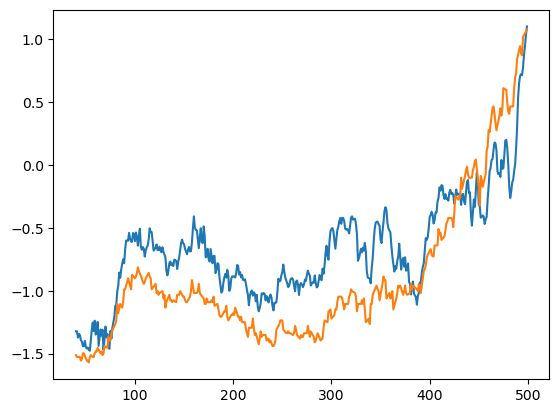

In [491]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])